In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading Train and test dataset

In [4]:
train = pd.read_csv("diabetic_data_train.csv")
test = pd.read_csv("diabetic_data_test.csv")
print("Shape of train data = ",train.shape)
print("Shape of test data = ",test.shape)

Shape of train data =  (76324, 51)
Shape of test data =  (25442, 51)


In [5]:
# train data contains 76324 rows test data contains 25442 rows
# Number of columns in the dataset is 50 and 1 target column = 51 total number of columns

print(train.shape[0]+test.shape[0])
# There are total number of 101766 enteries in both train and test dataset

101766


Concatenating train and test data set for EDA, CLEANING THE DATA AND FEATURE ENGINEERING

In [6]:
concat = pd.concat([train,test],axis=0)

In [7]:
#Dropping Unnamed: 0 column
concat.drop("Unnamed: 0",axis=1,inplace=True)

In [8]:
#Checking number of numeric and categorical columns
print("Number of numeric columns = ",len(concat.select_dtypes(include=np.number).columns))
print("Number of categorical columns = ",len(concat.select_dtypes(include=object).columns))

# categorical columns are way more then numeric columns

Number of numeric columns =  13
Number of categorical columns =  37


In [9]:
concat.isnull().sum()
#There are null values as per data dictionary have to deal that as the null values are written as something else

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [10]:
concat.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,338369606,159605546,AfricanAmerican,Male,[70-80),?,1,23,7,3,...,No,No,No,No,No,No,No,No,No,NO
1,90739116,83232054,Caucasian,Female,[70-80),[75-100),3,1,1,1,...,No,No,No,No,No,No,No,No,No,NO
2,64286964,95117913,Caucasian,Male,[60-70),?,3,1,1,4,...,No,No,No,No,No,No,No,Ch,Yes,>30
3,376610012,136697972,AfricanAmerican,Male,[40-50),?,3,1,1,2,...,No,No,No,No,No,No,No,No,No,NO
4,110557278,2851308,Caucasian,Male,[80-90),?,1,1,6,1,...,No,No,No,No,No,No,No,No,No,NO


null values are represented as '?'

Converting target column from multivariate to Bivariate

In [11]:
concat["readmitted"].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [12]:
# values not <30 will be converted to others
def binary(c):
    if c == "<30":
        return "<30"
    else:
        return "Other"
concat["readmitted"] = concat["readmitted"].apply(binary)

In [13]:
concat["readmitted"].value_counts()

Other    90409
<30      11357
Name: readmitted, dtype: int64

# EDA

In [14]:
num = concat.select_dtypes(include=np.number).columns
cat = concat.select_dtypes(object).columns

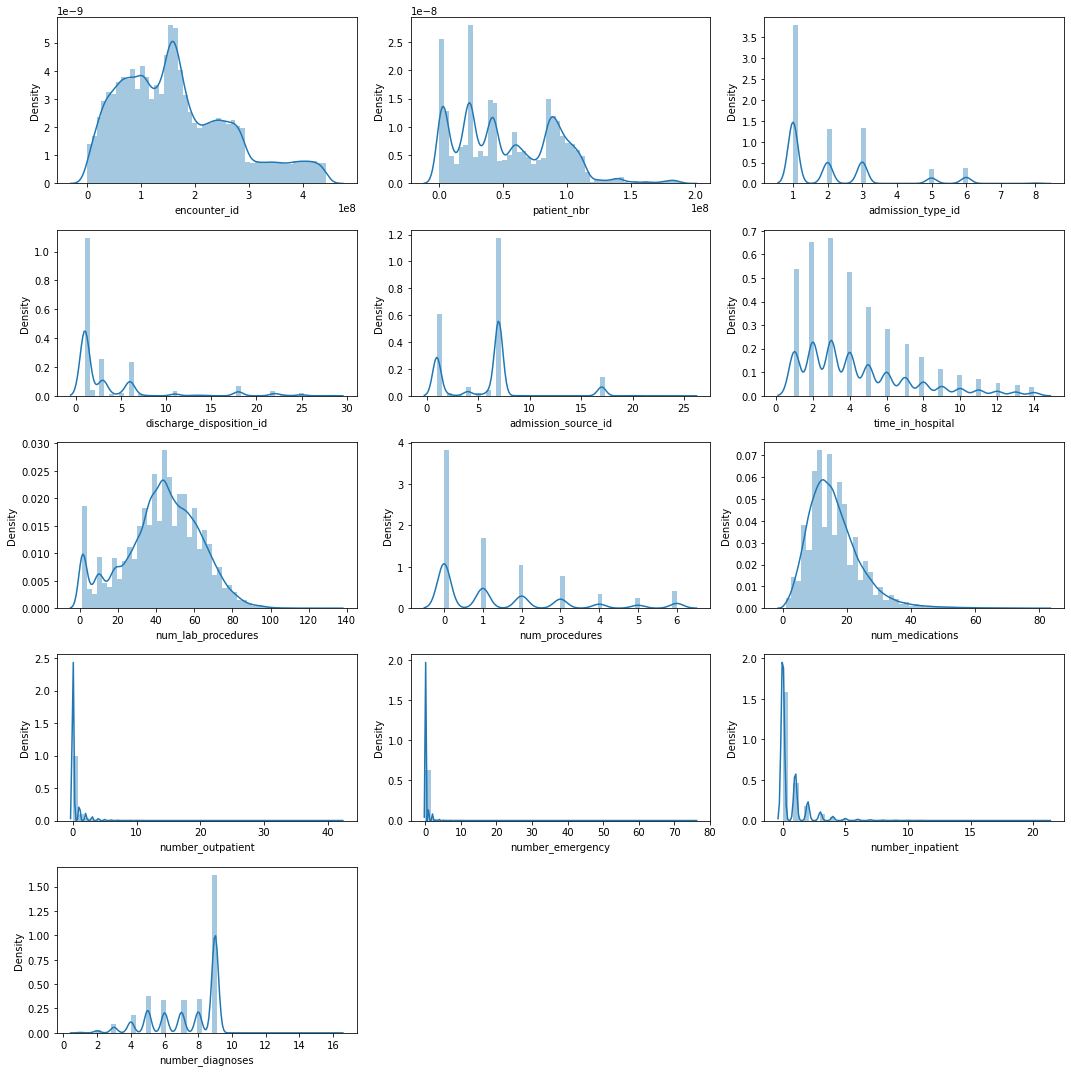

In [15]:
plt.figure(figsize=(15,15))
c=1
for col in num:
    try:
        plt.subplot(5,3,c)
        sns.distplot(concat[col])
        plt.xlabel(f"{col}")
        c+=1
    except:
        continue
plt.tight_layout()

AxesSubplot(0.125,0.125;0.775x0.755)


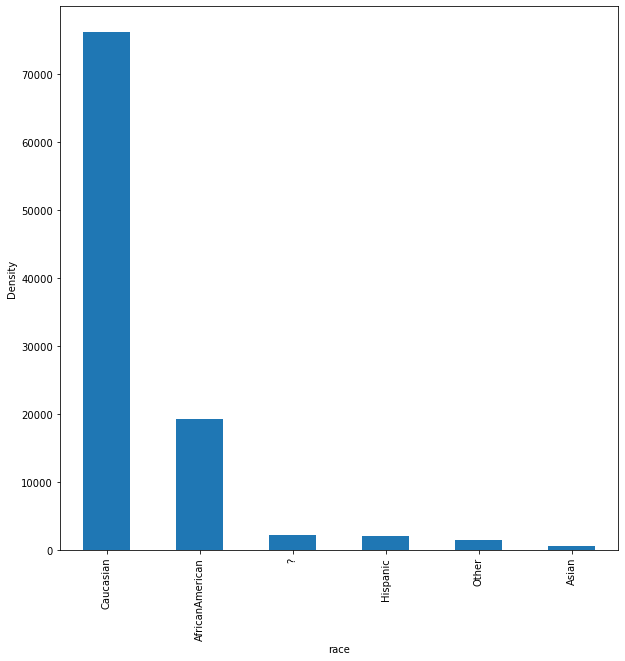

AxesSubplot(0.125,0.125;0.775x0.755)


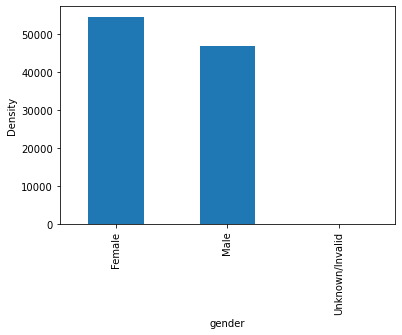

AxesSubplot(0.125,0.125;0.775x0.755)


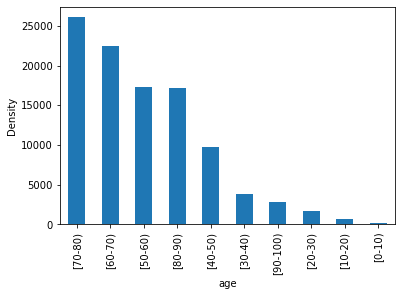

AxesSubplot(0.125,0.125;0.775x0.755)


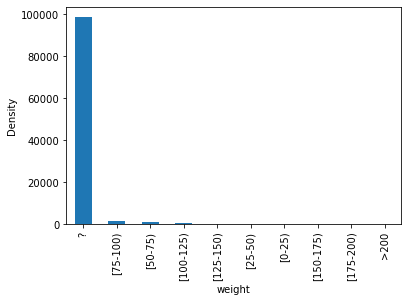

AxesSubplot(0.125,0.125;0.775x0.755)


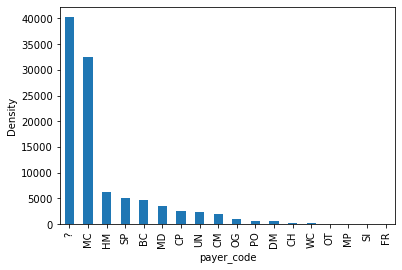

AxesSubplot(0.125,0.125;0.775x0.755)


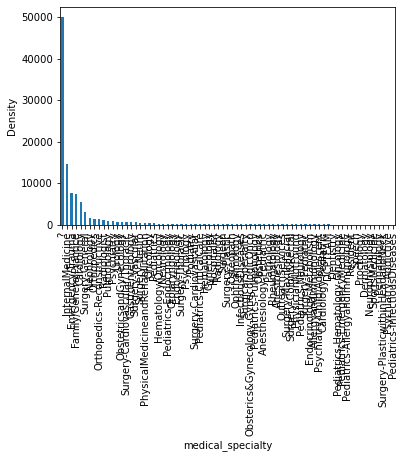

AxesSubplot(0.125,0.125;0.775x0.755)


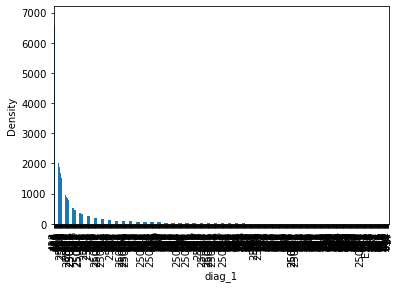

AxesSubplot(0.125,0.125;0.775x0.755)


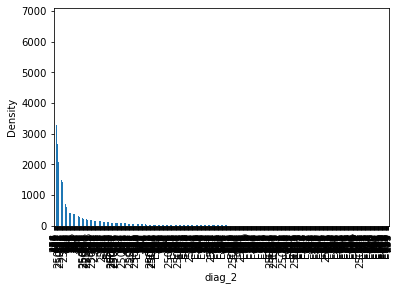

AxesSubplot(0.125,0.125;0.775x0.755)


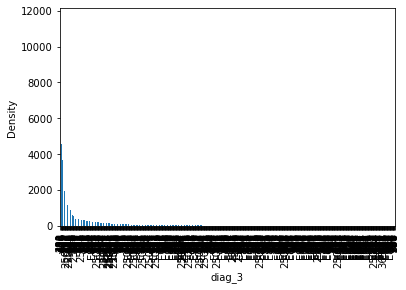

AxesSubplot(0.125,0.125;0.775x0.755)


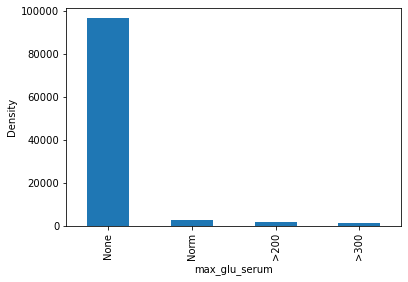

AxesSubplot(0.125,0.125;0.775x0.755)


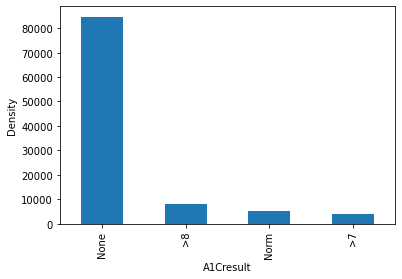

AxesSubplot(0.125,0.125;0.775x0.755)


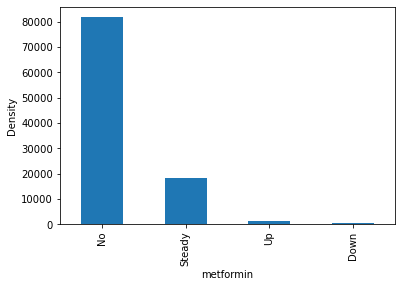

AxesSubplot(0.125,0.125;0.775x0.755)


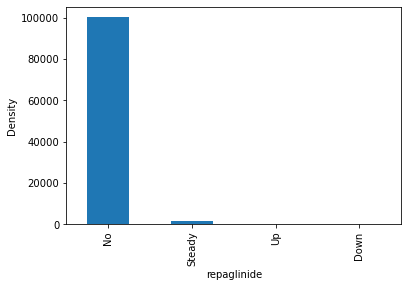

AxesSubplot(0.125,0.125;0.775x0.755)


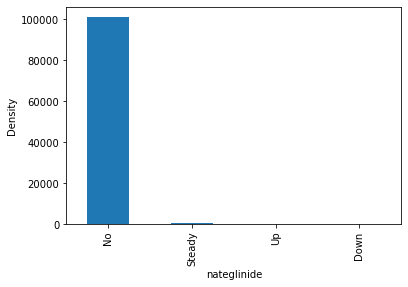

AxesSubplot(0.125,0.125;0.775x0.755)


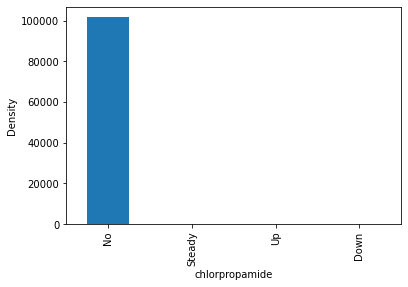

AxesSubplot(0.125,0.125;0.775x0.755)


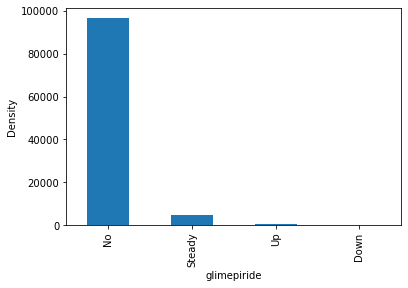

AxesSubplot(0.125,0.125;0.775x0.755)


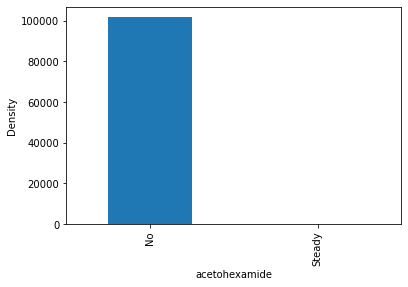

AxesSubplot(0.125,0.125;0.775x0.755)


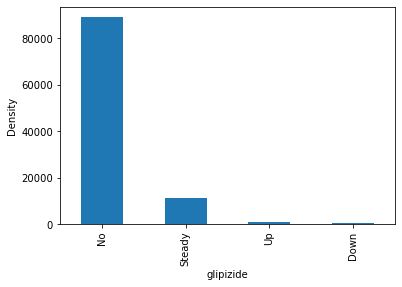

AxesSubplot(0.125,0.125;0.775x0.755)


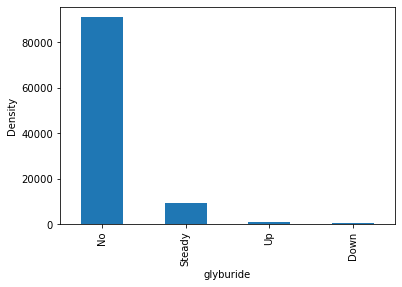

AxesSubplot(0.125,0.125;0.775x0.755)


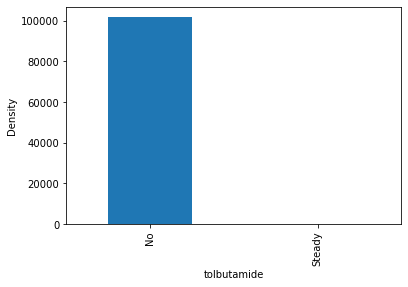

AxesSubplot(0.125,0.125;0.775x0.755)


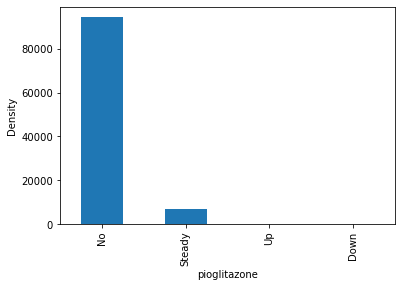

AxesSubplot(0.125,0.125;0.775x0.755)


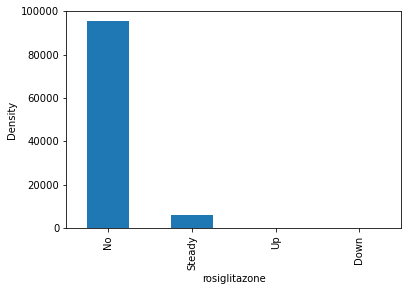

AxesSubplot(0.125,0.125;0.775x0.755)


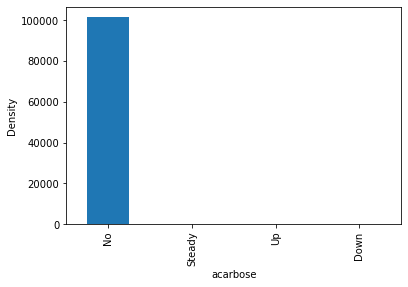

AxesSubplot(0.125,0.125;0.775x0.755)


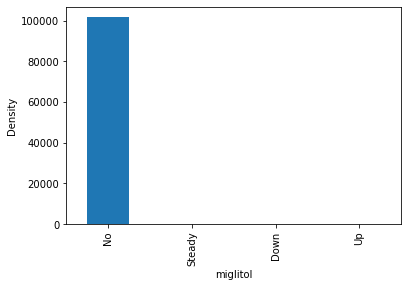

AxesSubplot(0.125,0.125;0.775x0.755)


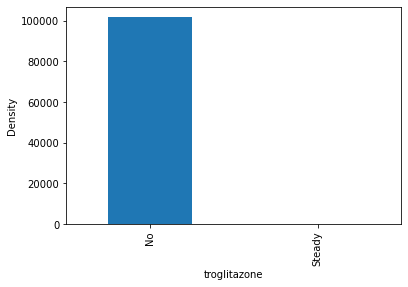

AxesSubplot(0.125,0.125;0.775x0.755)


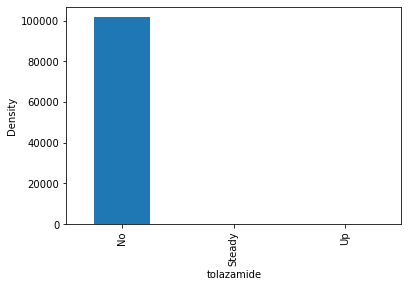

AxesSubplot(0.125,0.125;0.775x0.755)


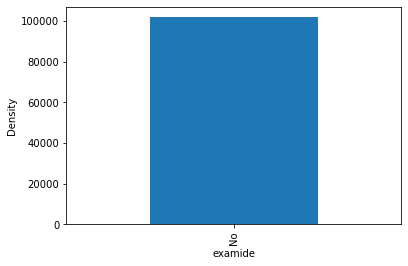

AxesSubplot(0.125,0.125;0.775x0.755)


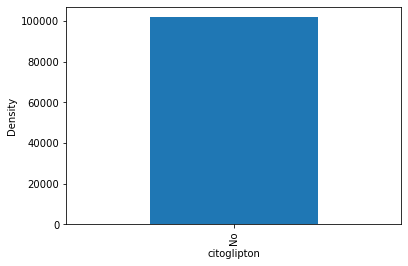

AxesSubplot(0.125,0.125;0.775x0.755)


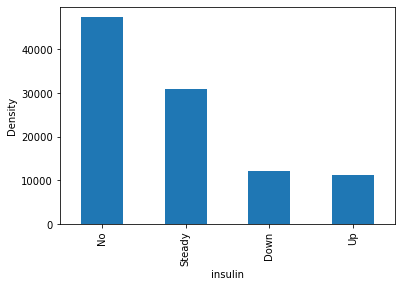

AxesSubplot(0.125,0.125;0.775x0.755)


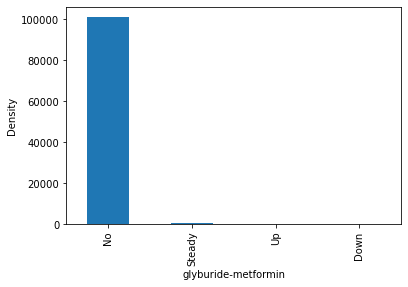

AxesSubplot(0.125,0.125;0.775x0.755)


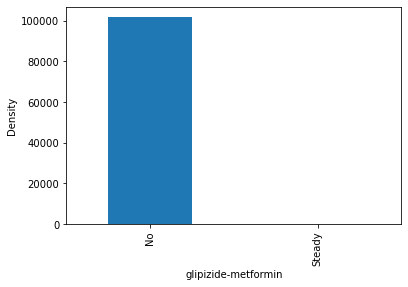

AxesSubplot(0.125,0.125;0.775x0.755)


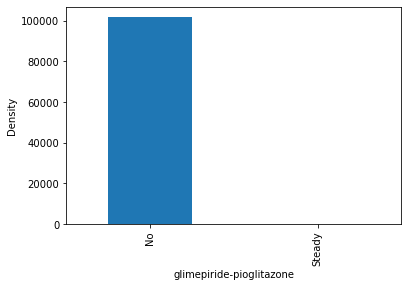

AxesSubplot(0.125,0.125;0.775x0.755)


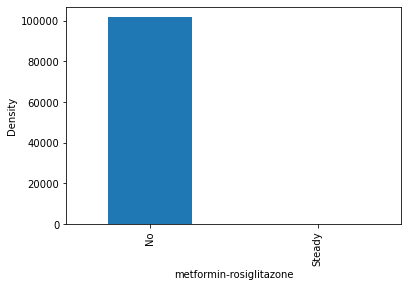

AxesSubplot(0.125,0.125;0.775x0.755)


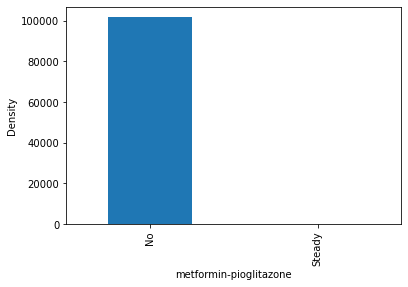

AxesSubplot(0.125,0.125;0.775x0.755)


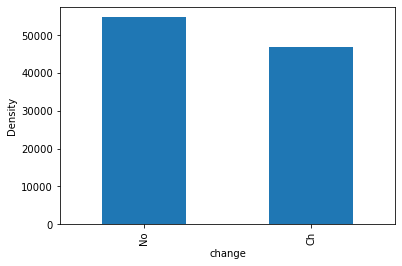

AxesSubplot(0.125,0.125;0.775x0.755)


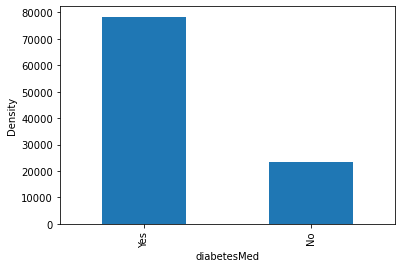

AxesSubplot(0.125,0.125;0.775x0.755)


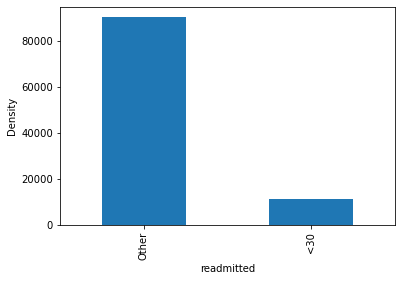

In [16]:
plt.figure(figsize=(10,10))
for col in cat:
    print(concat[col].value_counts().plot(kind="bar"))
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

In [17]:
#removing target column from categical column name list
cat = cat[:-1]

<AxesSubplot:>

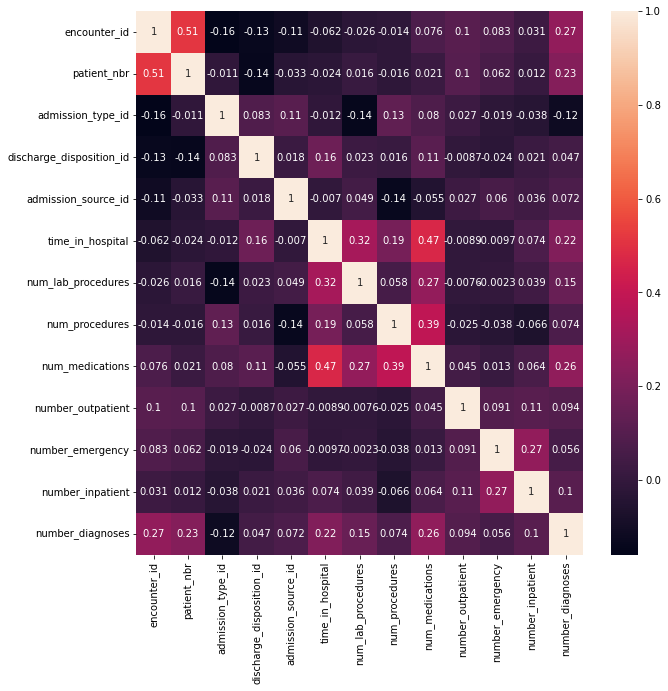

In [18]:
#ploting heatmap for seeing correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(concat.corr(),annot=True)

# Data Cleaning and Feature Engineering

In [19]:
#weight has 97% missing values so dropping it
concat.drop("weight",axis=1,inplace=True)

In [20]:
# dealing with race column misiing values with mode
concat.loc[concat["race"]=="?","race"]=concat["race"].mode().values[0]

In [21]:
#filling null values with mode
#Note missing values in the dataset is reprsented by ?
concat.loc[concat["payer_code"]=="?","payer_code"]=concat["payer_code"].value_counts().index[1]

In [22]:
#filling null values with mode
concat.loc[concat["medical_specialty"]=="?","medical_specialty"] = concat["medical_specialty"].value_counts().index[1]

In [23]:
#filling missing values of diag3 with mode
concat.loc[concat["diag_3"]=="?","diag_3"]=concat["diag_3"].mode().values[0]

In [24]:
#Dropping columns which have only 1 cateogory in it
cols = []
cat = concat.select_dtypes(include=object)
for col in cat:
    if len(concat[col].value_counts().index)==1:
        cols.append(col)
cols

['examide', 'citoglipton']

In [25]:
concat.drop(cols,axis=1,inplace=True)

In [26]:
#Dropping medical_speciality as its contain lots of category
concat.drop("medical_specialty",axis=1,inplace=True)

In [27]:
# dropping encounter_id and patient_nbr
concat.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)

Encoding Categorical columns

In [28]:
concat.shape

(101766, 44)

In [29]:
#removing target column from dataframe
x = concat.drop("readmitted",axis=1)
y = concat["readmitted"]

In [30]:
x.shape

(101766, 43)

In [31]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

for col in x.columns:
    if x[col].dtype == 'O':
        x[col] = label_encoder.fit_transform(x[col])

In [32]:
x.shape

(101766, 43)

# Model Training

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [34]:
y_ = y.copy()
y_ = y_.replace({"Other":0,"<30":1})

In [35]:
train_x = x.iloc[0:76324]
train_y = y_.iloc[0:76324]
test_x = x.iloc[76324:]
test_y = y_.iloc[76324:]

Scaling the data using standard scaler

In [36]:
sc = StandardScaler()
sc.fit(train_x)
train_x = sc.transform(train_x)
test_x = sc.transform(test_x)

Using Logistic Regression as base model

In [37]:
lr = LogisticRegression()
lr.fit(train_x,train_y)
pred_y = lr.predict(test_x)

In [38]:
pd.crosstab(test_y, pred_y, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,22570,33
1,2794,45


In [39]:
print("Accuracy of model:", round(accuracy_score(test_y,pred_y)*100, 2), "%")

Accuracy of model: 88.89 %


In [40]:
precision = precision_score(test_y,pred_y)
recall = recall_score(test_y,pred_y)
f1score  =f1_score(test_y,pred_y)

In [41]:
print("Precision of our model is = ",precision)
print("Recall of our model is = ",recall)
print("F1 score of our model is = ",f1score)

Precision of our model is =  0.5769230769230769
Recall of our model is =  0.01585065163790067
F1 score of our model is =  0.030853616729516628


Random Forest

In [42]:
rf = RandomForestClassifier()
rf.fit(train_x,train_y)
y_pred = rf.predict(test_x)

In [43]:
precision = precision_score(test_y,y_pred)
recall = recall_score(test_y,y_pred)
f1score  =f1_score(test_y,y_pred)

In [44]:
print("Accuracy of model:", round(accuracy_score(test_y,y_pred)*100, 2), "%")
print("Precision of our model is = ",precision)
print("Recall of our model is = ",recall)
print("F1 score of our model is = ",f1score)

Accuracy of model: 88.87 %
Precision of our model is =  0.625
Recall of our model is =  0.007044734061289186
F1 score of our model is =  0.013932427725531174


In [45]:
pd.crosstab(test_y, y_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,22589,14
1,2813,26
